# 1_Descriptive Analytics

In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [4]:
file_path = 'sales_data_with_discounts.csv'

In [5]:
# Load the dataset
data = pd.read_csv(file_path)

In [6]:
# Display the first few rows of the dataframe to verify it loaded correctly
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [33]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns: ",numerical_columns)

Numerical columns:  Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [34]:
# Calculate mean, median, mode, and standard deviation for numerical columns
statistics={}
for column in numerical_columns:
    mean = data[column].mean()
    median = data[column].median()
    mode = data[column].mode()[0]  # mode() returns a Series; take the first value
    std_dev = data[column].std()
    statistics[column]= {
        'mean': mean,
        'median': median,
        'mode': mode,
        'std_dev': std_dev
         }
  
statistics_data = pd.DataFrame(statistics)
statistics_data = statistics_data
# print(statistics_data)

data1=pd.DataFrame(statistics_data.T)
data1


,mean,median,mode,std_dev
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


In [7]:
# Interpretation of the statistics
print("\nInterpretation of the statistics:")
for column, stats in statistics.items():
    print(f"\nColumn: {column}")
    print(f"The mean of {column} is {stats['mean']}, which indicates the average value.")
    print(f"The median of {column} is {stats['median']}, showing the middle value when the data is sorted.")
    print(f"The mode of {column} is {stats['mode']}, representing the most frequent value in the data.")
    print(f"The standard deviation of {column} is {stats['std_dev']}, which measures the dispersion or variability around the mean.")


Interpretation of the statistics:

Column: Volume
The mean of Volume is 5.066666666666666, which indicates the average value.
The median of Volume is 4.0, showing the middle value when the data is sorted.
The mode of Volume is 3, representing the most frequent value in the data.
The standard deviation of Volume is 4.231602391213926, which measures the dispersion or variability around the mean.

Column: Avg Price
The mean of Avg Price is 10453.433333333332, which indicates the average value.
The median of Avg Price is 1450.0, showing the middle value when the data is sorted.
The mode of Avg Price is 400, representing the most frequent value in the data.
The standard deviation of Avg Price is 18079.90483993645, which measures the dispersion or variability around the mean.

Column: Total Sales Value
The mean of Total Sales Value is 33812.83555555555, which indicates the average value.
The median of Total Sales Value is 5700.0, showing the middle value when the data is sorted.
The mode of

# 2_ Histogram

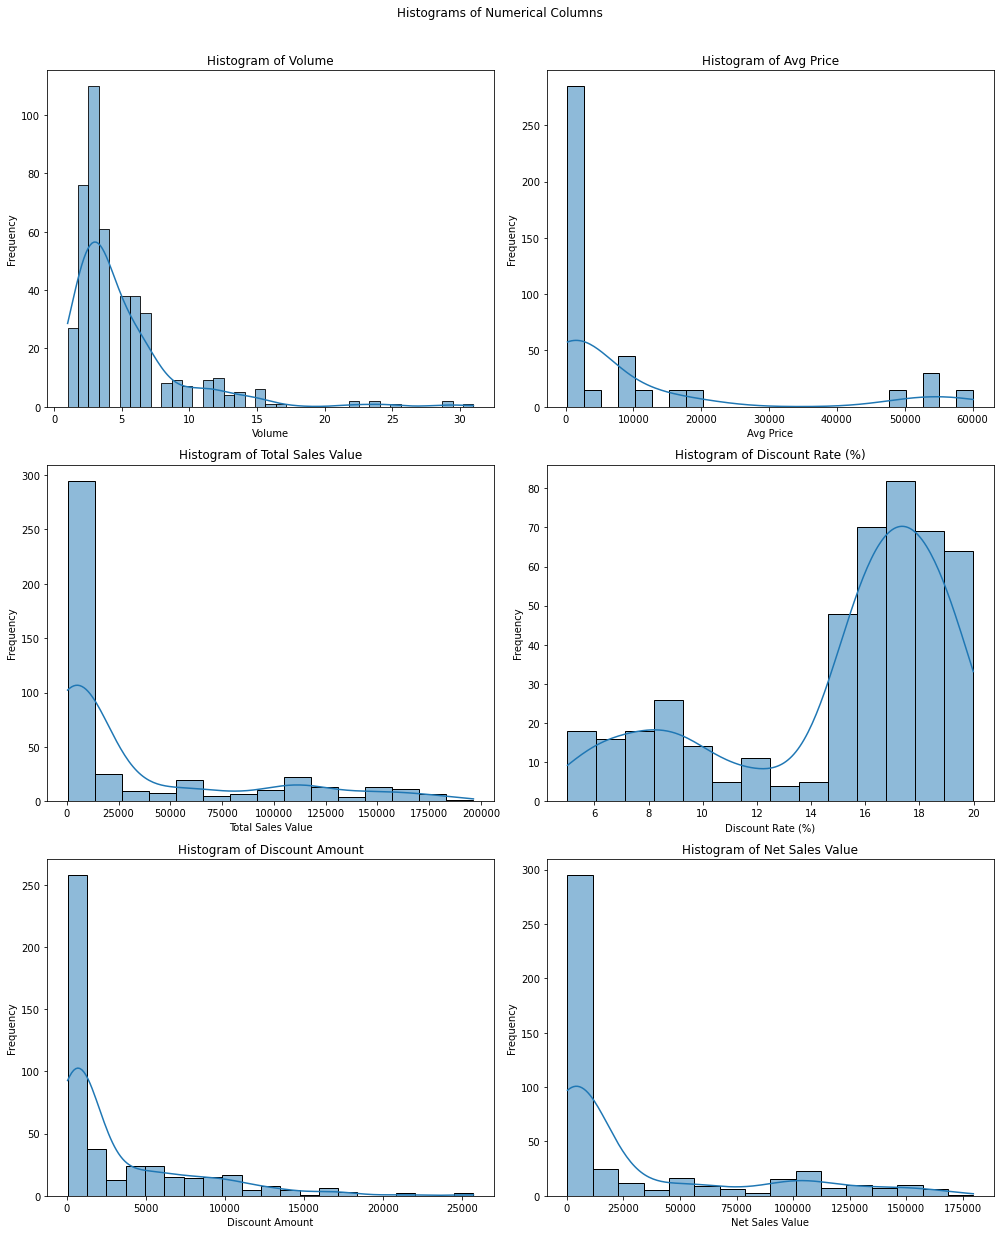

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
fig.suptitle('Histograms of Numerical Columns')

# Plotting histograms for each numerical column
numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
for i, column in enumerate(numerical_columns):
    sns.histplot(data[column], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Histogram of {column}')
    axes[i//2, i%2].set_xlabel(column)
    axes[i//2, i%2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

In [9]:
# Analyzing distributions
analysis = {
    'Volume': 'Positively skewed (right skewed). Most sales volumes are on the lower side, with few instances of higher volumes.',
    'Avg Price': 'Bimodal. There are two peaks, suggesting two different pricing segments or ranges.',
    'Total Sales Value': 'Positively skewed (right skewed). Most sales values are lower, with few instances of very high sales values.',
    'Discount Rate (%)': 'Slightly positively skewed. Most discount rates are concentrated towards the lower end, with a gradual decrease in frequency as the discount rate increases.',
    'Discount Amount': 'Positively skewed (right skewed). Most discount amounts are on the lower side, with few instances of higher discounts.',
    'Net Sales Value': 'Positively skewed (right skewed). Most net sales values are lower, with few instances of very high net sales values.'
}
# Printing analysis
for column, desc in analysis.items():
    print(f"{column}:\n - {desc}\n")


Volume:
 - Positively skewed (right skewed). Most sales volumes are on the lower side, with few instances of higher volumes.

Avg Price:
 - Bimodal. There are two peaks, suggesting two different pricing segments or ranges.

Total Sales Value:
 - Positively skewed (right skewed). Most sales values are lower, with few instances of very high sales values.

Discount Rate (%):
 - Slightly positively skewed. Most discount rates are concentrated towards the lower end, with a gradual decrease in frequency as the discount rate increases.

Discount Amount:
 - Positively skewed (right skewed). Most discount amounts are on the lower side, with few instances of higher discounts.

Net Sales Value:
 - Positively skewed (right skewed). Most net sales values are lower, with few instances of very high net sales values.



# 3_Boxplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


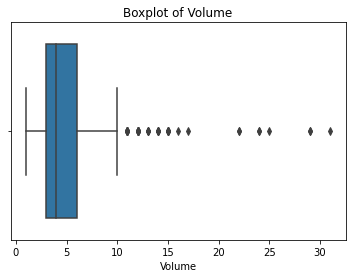

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


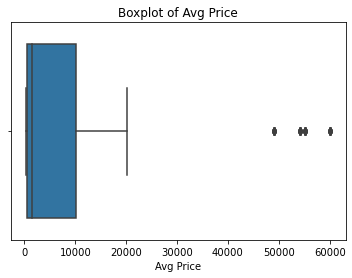

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


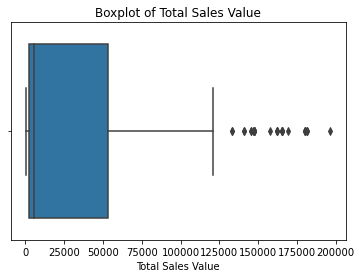

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


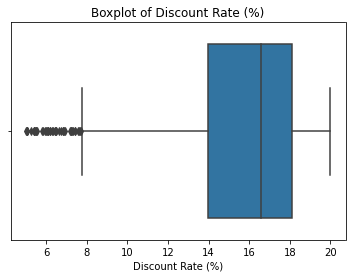

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


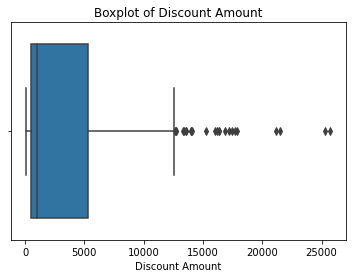

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


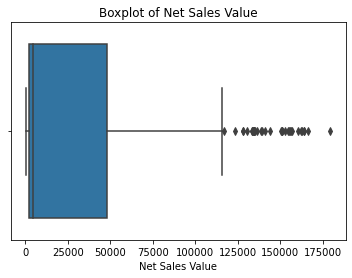

In [10]:
#boxplots for numerical variables 
for column in numerical_columns:
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [17]:
# Calculate Interquartile range
q1 = np.percentile(data['Volume'], 25)
q3 = np.percentile(data['Volume'], 75)
iqr = q3 - q1

print("Interquartile Range (IQR): ",iqr)

Interquartile Range (IQR):  3.0


In [21]:
for column in numerical_columns:
    q1 = np.percentile(data[column],25)
    q3 = np.percentile(data[column],75)
    iqr = q3 - q1

    print("Interquartile Range (IQR): ",iqr)

Interquartile Range (IQR):  3.0
Interquartile Range (IQR):  9635.0
Interquartile Range (IQR):  50500.0
Interquartile Range (IQR):  4.149655934050962
Interquartile Range (IQR):  4856.03612280112
Interquartile Range (IQR):  45645.70420627015


# 4_Bar chart

In [12]:
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [13]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:", categorical_columns)


Categorical Columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


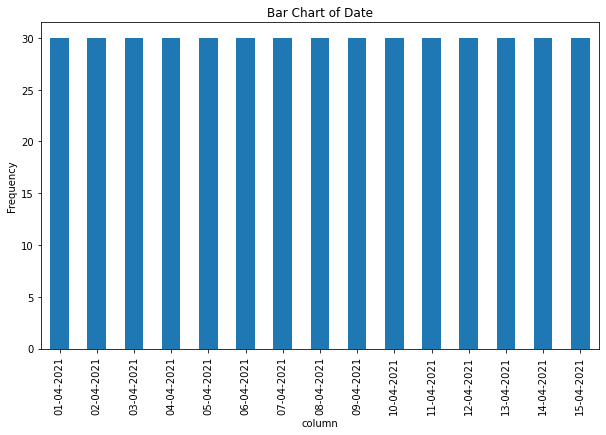

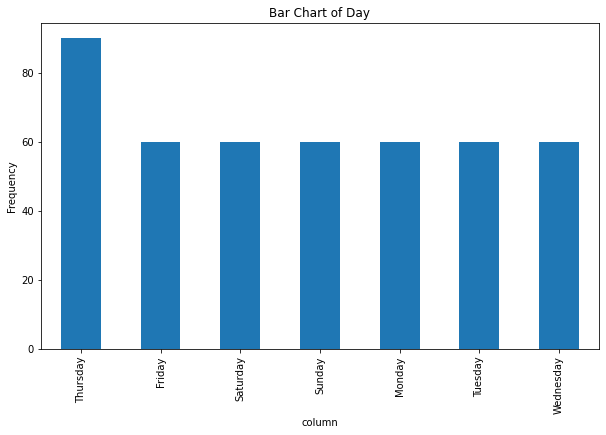

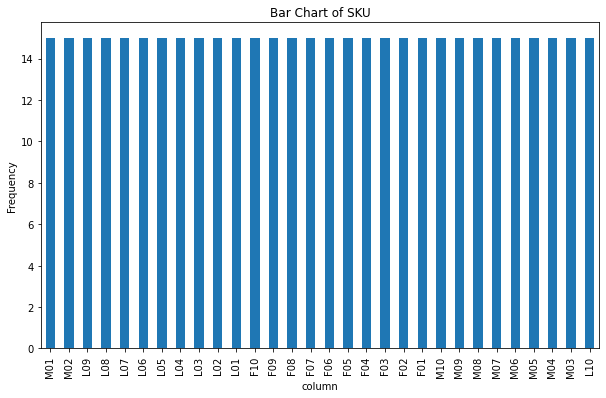

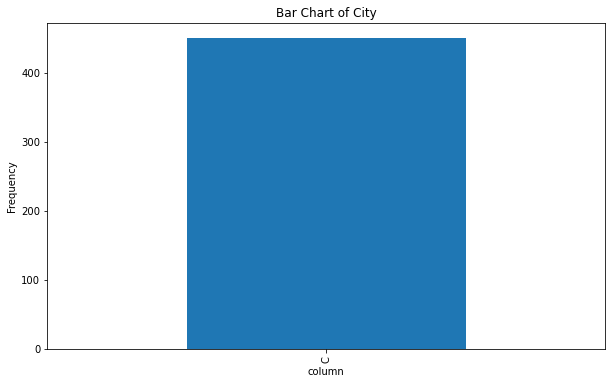

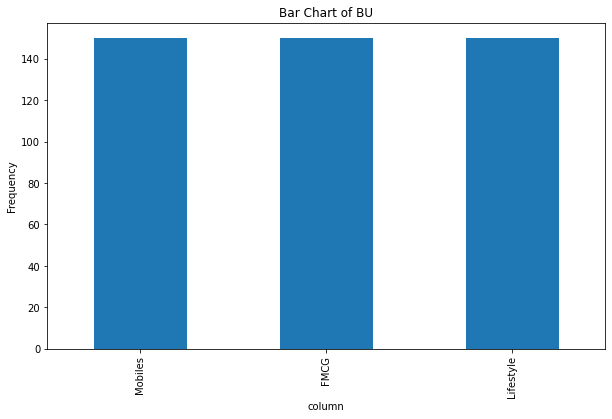

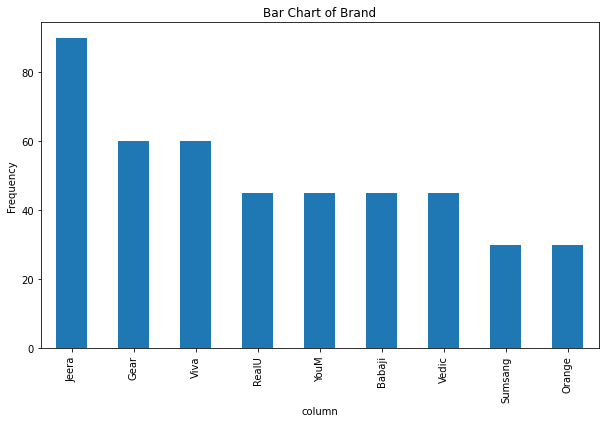

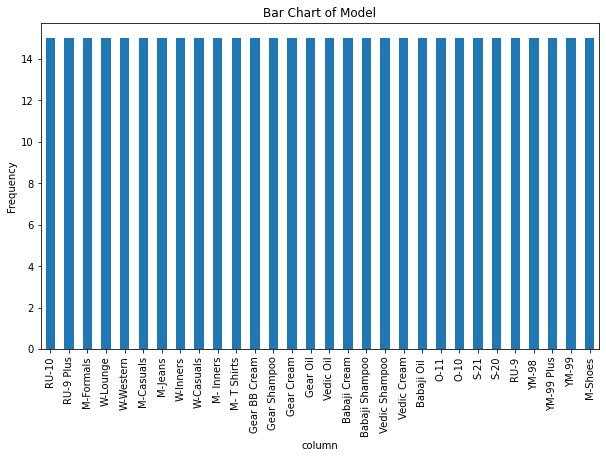

In [14]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    data[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel('column')
    plt.ylabel('Frequency')
    plt.show()

# 5_Standardization

Standardization, also known as z-score normalization, is a technique used to transform numerical data in a dataset so that it has a mean of 0 and a standard deviation of 1. This process makes the data more interpretable and comparable across different variables by removing the units of measurement and scaling the values relative to their distribution.

The formula for standardization, or calculating the z-score, for a numerical column 𝑥 with mean μ and standard deviation 𝜎 
is : 𝑧=𝑥−𝜇/𝜎
​
#explanation of the process:
Calculate Mean and Standard Deviation : Compute the mean (μ) and standard deviation (σ) of the numerical column.
Subtract Mean: Subtract the mean (μ) from each value in the column. This centers the data around 0.
Divide by Standard Deviation: Divide the centered values by the standard deviation (σ). This scales the data, ensuring that the standard deviation of the standardized data is 1.
By standardizing the data, you transform it into a distribution with a mean of 0 and a standard deviation of 1, which makes it easier to interpret and compare different variables

# 6_Dummy Variables

Need for Converting Categorical Data into Dummy Variables:
Algorithm Compatibility: Many machine learning algorithms, such as linear regression, decision trees, and neural networks, require numerical input. Categorical variables, which represent qualitative data, cannot be directly fed into these algorithms.

Preventing Ordinal Interpretation: If categorical variables are encoded as ordinal integers (e.g., 1, 2, 3), the algorithm might interpret them as having an inherent order or hierarchy, which might not be appropriate for all categorical variables.

One-Hot Encoding:
One-hot encoding is a method used to convert categorical variables into a binary format. For each category in a categorical variable, one binary column is created. If a data point belongs to a particular category, the corresponding binary column is set to 1; otherwise, it is set to 0.

In [26]:
# Select only categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical Columns:", categorical_columns)


Categorical Columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


In [27]:
# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(categorical_columns, columns=['Day','SKU','BU', 'Brand', 'Model'])
data_encoded

,BU,Brand,City,Date,Day,Model,SKU
0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
5,0,1,0,0,0,0,0
6,0,0,0,0,0,1,0
